In [1321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1322]:
df=pd.read_csv(r'D:\api_sentiment\Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [1323]:
df.shape

(27481, 4)

In [1325]:
df.dropna(inplace=True)

In [1326]:
df.drop(columns=['textID','selected_text'],inplace=True)

In [1327]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [1328]:
df=df.sample(1000,random_state=42)

In [1329]:
df.shape

(1000, 2)

In [1330]:
df['sentiment'].value_counts()

sentiment
neutral     393
positive    326
negative    281
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_21680\97300846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='sentiment',palette=colors)


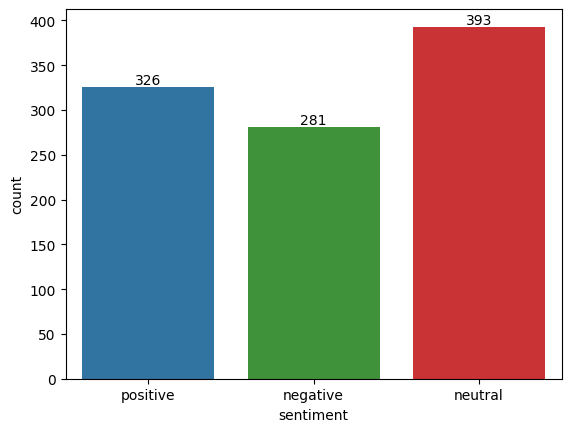

In [1331]:
colors = ["#1f78b4", "#33a02c", "#e31a1c"]
ax=sns.countplot(data=df,x='sentiment',palette=colors)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [1332]:
import contractions
import contractions
import nltk
from textblob import TextBlob
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re

ps = PorterStemmer()

In [1333]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [1334]:
df.duplicated().sum()

0

In [1335]:
def remove_httml_tags(text):
    res=re.sub('< .*?>','',text)
    return res

In [1336]:
df['text']=df['text'].apply(remove_httml_tags)

In [1337]:
df.head()

,text,sentiment
1589,Enjoy! Family trumps everything,positive
10414,--of them kinda turns me off of it all. And ...,negative
6562,Clive it`s my birthday pat me http://apps.fac...,neutral
2603,congrats hey,positive
4004,is texting,neutral


In [1338]:
def transform(text):
    text=text.lower()
    y=[]
    for i in text.split():
        y.append(contractions.fix(i))
    text=" ".join(y)
    text=nltk.word_tokenize(text)
    y.clear()
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for word in text:
        y.append(str(TextBlob(word).correct()))
    text=y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words("english") and word  not in string.punctuation:
            y.append(word)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)




In [1339]:
text=" I don't want"
print(transform(text))

want


In [1340]:
df['No_of Char']=df['text'].apply(len)
df['No_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [1341]:
df.sample()

,text,sentiment,No_of Char,No_of_words
2509,my deep fry drumsticks were not as good as i t...,negative,66,14


In [1342]:
print("Average number of characters in Positive Sentiment -",df[df['sentiment']=='positive']['No_of Char'].mean())
print("Average number of Words in Positive Sentiment -",df[df['sentiment']=='positive']['No_of_words'].mean())

Average number of characters in Positive Sentiment - 69.98466257668711
Average number of Words in Positive Sentiment - 16.13803680981595


In [1343]:
print("Average number of characters in negative Sentiment -",df[df['sentiment']=='negative']['No_of Char'].mean())
print("Average number of Words in negative Sentiment -",df[df['sentiment']=='negative']['No_of_words'].mean())

Average number of characters in negative Sentiment - 71.58362989323844
Average number of Words in negative Sentiment - 17.249110320284696


In [1344]:
print("Average number of characters in neutral Sentiment -",df[df['sentiment']=='neutral']['No_of Char'].mean())
print("Average number of Words in neutral Sentiment -",df[df['sentiment']=='neutral']['No_of_words'].mean())

Average number of characters in neutral Sentiment - 65.11704834605598
Average number of Words in neutral Sentiment - 15.101781170483461


In [1345]:
df['text']=df['text'].apply(transform)

In [1346]:
df.head()

,text,sentiment,No_of Char,No_of_words
1589,enjoy famili troop everyth,positive,32,5
10414,kind turn buy dig deeper hole etc,negative,100,28
6562,live birthday pat http,neutral,84,11
2603,congress hey,positive,13,2
4004,test,neutral,10,2


In [1347]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['sentiment']=lr.fit_transform(df['sentiment'])

In [1348]:
df.head(5)

,text,sentiment,No_of Char,No_of_words
1589,enjoy famili troop everyth,2,32,5
10414,kind turn buy dig deeper hole etc,0,100,28
6562,live birthday pat http,1,84,11
2603,congress hey,2,13,2
4004,test,1,10,2


In [1190]:
# neutral-1
# positive-2 
# negative-0

<Axes: >

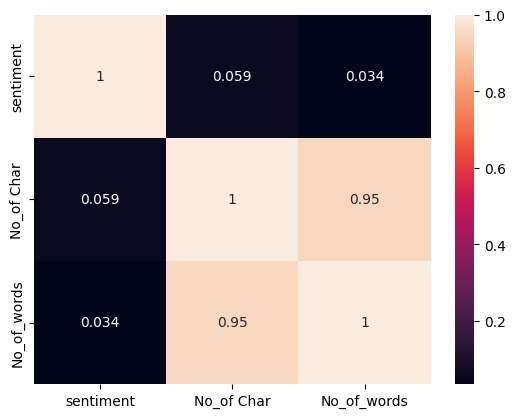

In [1191]:
sns.heatmap(df[['sentiment','No_of Char','No_of_words']].corr(),annot=True)

In [1126]:
def most_frequent_words(sentiment_value,text_column):
    sentiment_df=df[df['sentiment']==sentiment_value]
    all_text=" ".join(sentiment_df[text_column])
    tokens=word_tokenize(all_text)
    freq=FreqDist(tokens)
    most_frequent_words=freq.most_common(10)
    return most_frequent_words

In [1192]:
#0-negative
most_frequent_words(0,'text')

[('go', 36),
 ('miss', 25),
 ('like', 20),
 ('feel', 17),
 ('work', 16),
 ('got', 16),
 ('know', 16),
 ('think', 15),
 ('get', 14),
 ('realli', 12)]

In [1193]:
#2-positive
most_frequent_words(2,'text')

[('love', 48),
 ('good', 48),
 ('day', 37),
 ('go', 29),
 ('thank', 27),
 ('happi', 25),
 ('like', 25),
 ('great', 23),
 ('mother', 20),
 ('see', 17)]

In [1194]:
#1-neutral
most_frequent_words(1,'text')

[('go', 49),
 ('get', 35),
 ('day', 29),
 ('work', 25),
 ('http', 22),
 ('got', 20),
 ('new', 20),
 ('know', 20),
 ('want', 18),
 ('night', 17)]

In [1195]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(df['text']).toarray()
y=df['sentiment'].values

In [1196]:
x=np.array(x)
y=np.array(y)

In [1197]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# x=pca.fit_transform(x)

In [1198]:
x.shape

(1000, 2015)

In [1199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [1200]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay

In [1201]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [1202]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
accuracy_score(y_test,pred)

0.41

In [1203]:
# mnb.fit(x_train,y_train)
# pred=mnb.predict(x_test)
# accuracy_score(y_test,pred)

In [1204]:
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
accuracy_score(y_test,pred)

0.48

In [1205]:
x.shape

(1000, 2015)

Accuracy_Score 0.585


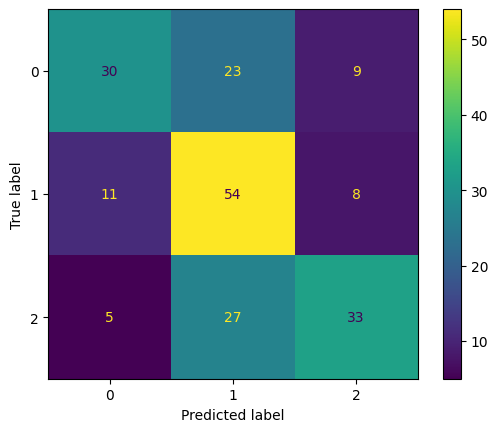

In [1228]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced',tol=0.3,max_iter=100,multi_class='multinomial',C=2,solver='lbfgs',)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Accuracy_Score",accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

Accuracy_score 0.59


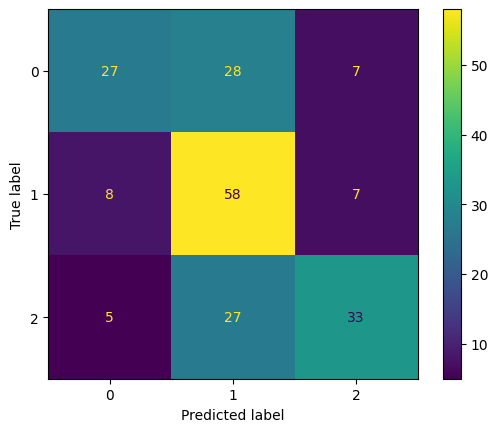

In [1242]:
from sklearn.svm import SVC
svc=SVC(C=3.5,kernel='rbf',gamma=0.3,coef0=0.03,tol=0.2,class_weight='balanced',probability=True)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

Accuracy_score 0.56


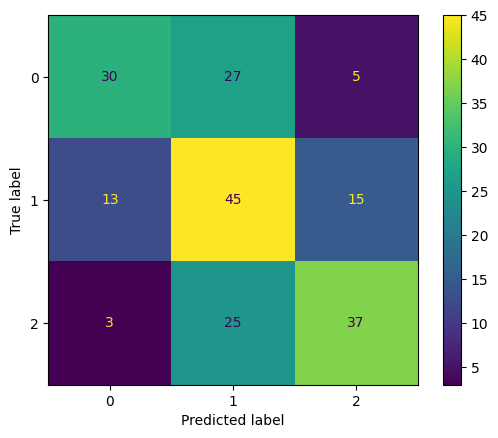

In [1253]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 150, splitter= 'best',min_samples_split=4,random_state=42,class_weight='balanced')
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

Accuracy_score 0.56
0.5825


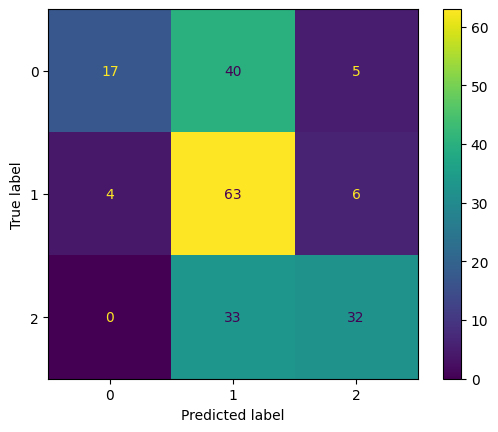

In [1262]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=190,criterion= 'gini',min_samples_split=4,random_state=42,oob_score=True,n_jobs=-1)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print(rf.oob_score_)
cm = confusion_matrix(y_test, pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()


Accuracy_score 0.445


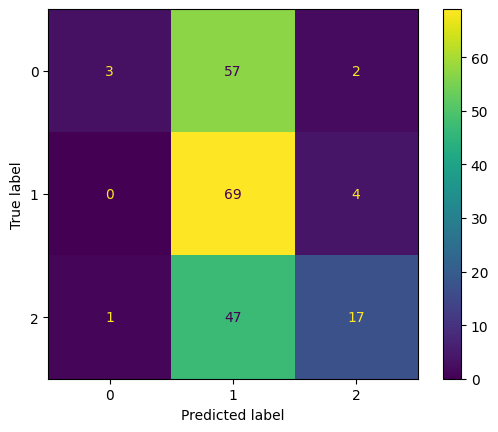

In [1268]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=120,learning_rate=0.1)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=adc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adc.classes_)
disp.plot()
plt.show()

In [1269]:
dt.get_depth()

127

Accuracy_score 0.595


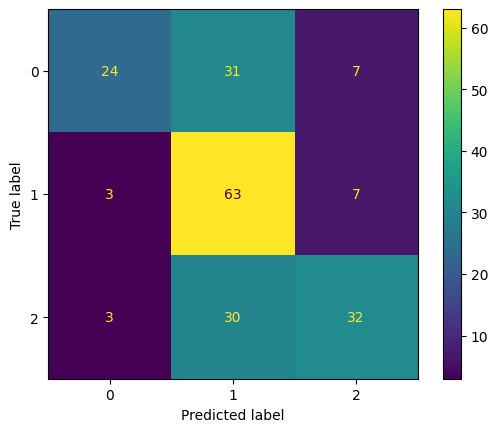

In [1305]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=[('lr',lr),('svc',svc),('gbr',bg)],voting='soft',n_jobs=-1)
vt.fit(x_train,y_train)
pred=vt.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=vt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=vt.classes_)
disp.plot()
plt.show()

Accuracy_score 0.545


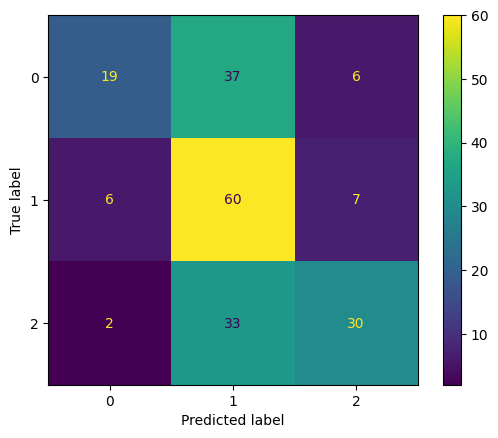

In [1283]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=[('gbc',gbr),('adb',adc),('gbr',etc),('svc',svc)],voting='soft',n_jobs=-1)
vt.fit(x_train,y_train)
pred=vt.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=vt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=vt.classes_)
disp.plot()
plt.show()

In [1273]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(DecisionTreeClassifier(criterion= 'gini', max_depth= 180, splitter= 'best',class_weight='balanced',min_samples_split=2,random_state=42),
                     n_estimators=250,bootstrap=True,n_jobs=-1)
bg.fit(x_train,y_train)
pred=bg.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))

Accuracy_score 0.59


Accuracy_score 0.525


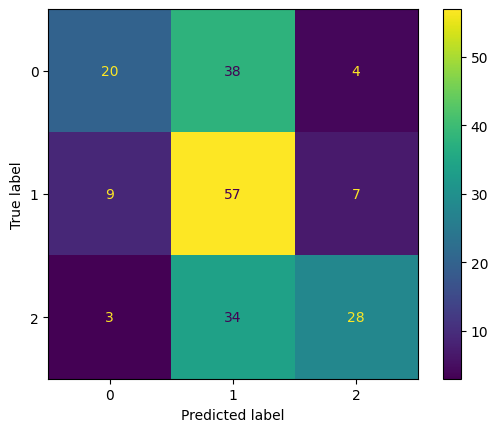

In [1274]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier(learning_rate=0.4,n_estimators=150,tol=0.2)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=gbr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbr.classes_)
disp.plot()
plt.show()

Accuracy_score 0.565


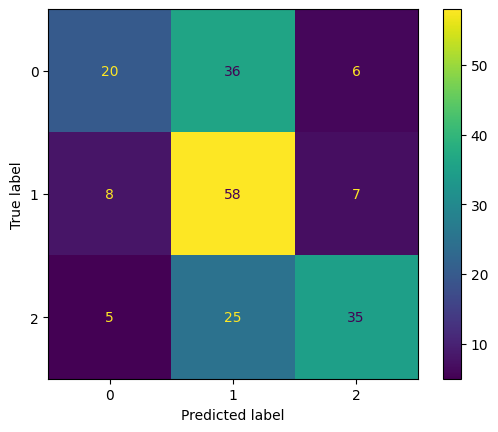

In [1281]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=160,criterion='log_loss',max_depth=150)
etc.fit(x_train,y_train)
pred=etc.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=etc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=etc.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = [{'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'max_depth': [1,2,3,4,5,100, 150, 200, 210, 215]}]

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Create the GridSearchCV object with error_score='raise'
gs = GridSearchCV(dt, cv=10, param_grid=param_grid, scoring='accuracy', error_score='raise')

# Fit the model
gs.fit(x_train, y_train)

# Get the best parameters
best_params = gs.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}


In [ ]:
param_grid = [{'n_estimators':[50,100,150,200],
               'criterion': ['gini', 'entropy','log_loss'],
               'max_depth': [100, 150,180 ,190,200, 210, 215],
               'min_samples_split': [2,3,4,5,6],
               'max_features': ["sqrt",'log2',None]}]



# Create the GridSearchCV object with error_score='raise'
gs = GridSearchCV(rf, cv=20, param_grid=param_grid, scoring='accuracy', error_score='raise')

# Fit the model
gs.fit(x_train, y_train)

# Get the best parameters
best_params = gs.best_params_
print("Best Parameters:", best_params)

K-Fold in SVC

In [ ]:
indices=np.arange(len(x))
np.random.shuffle(indices)
x_s=x[indices]
y_s=y[indices]
x_split=np.array_split(x_s,5)
y_split=np.array_split(y_s,5)
score=[]

for i in range(len(x_split)):
    x_tr,x_te=np.concatenate(x_split[:i]+x_split[i+1:]),x_split[i]
    y_tr,y_te=np.concatenate(y_split[:i]+y_split[i+1:]),y_split[i]

    svc.fit(x_tr,y_tr)
    pred=svc.predict(x_te)
    accuracy = accuracy_score(y_te, pred)
    score.append(accuracy)


print(score)
print(np.mean(score))




[0.54, 0.56, 0.56, 0.58, 0.58]
0.5640000000000001


K-Fold in Random Forest

In [ ]:
indices=np.arange(len(x))
np.random.shuffle(indices)
x_s=x[indices]
y_s=y[indices]
x_split=np.array_split(x_s,5)
y_split=np.array_split(y_s,5)
score=[]
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 180, splitter= 'best',class_weight='balanced',min_samples_split=2,random_state=42)

for i in range(len(x_split)):
    x_tr,x_te=np.concatenate(x_split[:i]+x_split[i+1:]),x_split[i]
    y_tr,y_te=np.concatenate(y_split[:i]+y_split[i+1:]),y_split[i]

    dt.fit(x_tr,y_tr)
    pred=dt.predict(x_te)
    accuracy = accuracy_score(y_te, pred)
    score.append(accuracy)

print(score)
print(np.mean(score))

[0.605, 0.63, 0.6, 0.585, 0.565]
0.597


K-Fold in vooting Classifier

In [ ]:
indices=np.arange(len(x))
np.random.shuffle(indices)
x_s=x[indices]
y_s=y[indices]
x_split=np.array_split(x_s,5)
y_split=np.array_split(y_s,5)
score=[]

for i in range(len(x_split)):
    x_tr,x_te=np.concatenate(x_split[:i]+x_split[i+1:]),x_split[i]
    y_tr,y_te=np.concatenate(y_split[:i]+y_split[i+1:]),y_split[i]

    vt.fit(x_tr,y_tr)
    pred=vt.predict(x_te)
    accuracy = accuracy_score(y_te, pred)
    score.append(accuracy)

print(score)
print(np.mean(score))

[0.665, 0.61, 0.575, 0.535, 0.625]
0.602


K-Fold on Bagging Classifier

In [ ]:
score=[]
indices=np.arange(len(x))
np.random.shuffle(indices)
x_s=x[indices]
y_s=y[indices]
x_split=np.array_split(x,5)
y_split=np.array_split(y,5)
for i in range(len(x_split)):
    x_t,x_v=np.concatenate(x_split[:i]+x_split[i+1:]),x_split[i]
    y_t,y_v=np.concatenate(y_split[:i]+y_split[i+1:]),y_split[i]

    bg.fit(x_t,y_t)
    pred=bg.predict(x_v)
    accuracy=accuracy_score(y_v,pred)
    score.append(accuracy)


print(score)
print(np.mean(score))



[0.575, 0.59, 0.595, 0.64, 0.685]
0.617


In [1349]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=tf.fit_transform(df['text']).toarray()
y=df['sentiment'].values

In [1350]:
x=np.array(x)
y=np.array(y)

In [1351]:
x.shape

(1000, 2009)

In [1352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [1353]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
accuracy_score(y_test,pred)

0.4

In [1354]:
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
accuracy_score(y_test,pred)

0.48

Accuracy_Score 0.61


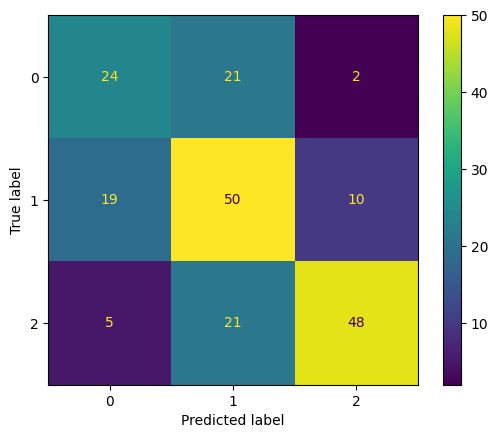

In [1370]:
from sklearn.linear_model import LogisticRegression
lr_n=LogisticRegression(class_weight='balanced',tol=0.001,max_iter=100,multi_class='multinomial',C=0.7,solver='lbfgs',)
lr_n.fit(x_train,y_train)
pred=lr_n.predict(x_test)
print("Accuracy_Score",accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=lr_n.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr_n.classes_)
disp.plot()
plt.show()

Accuracy_score 0.62


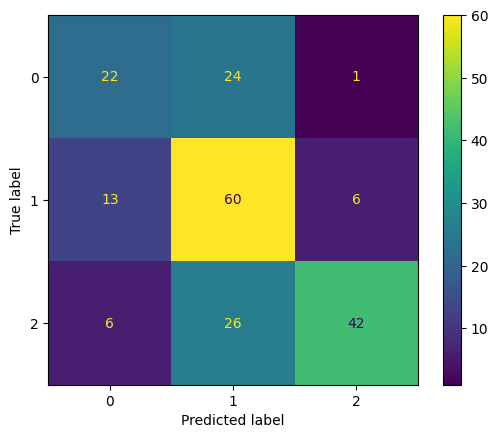

In [1392]:
from sklearn.svm import SVC
svc_c=SVC(C=2.0,kernel='sigmoid',gamma=0.3,coef0=0.03,tol=0.1,class_weight='balanced',probability=True)
svc_c.fit(x_train,y_train)
pred=svc_c.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=svc_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_c.classes_)
disp.plot()
plt.show()

Accuracy_score 0.6


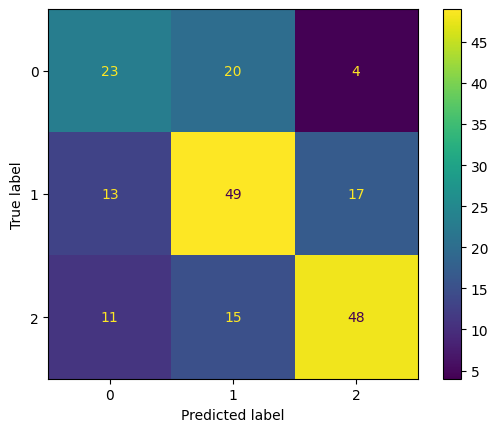

In [1401]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 170, splitter= 'best',min_samples_split=2,random_state=42,class_weight='balanced')
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

Accuracy_score 0.56


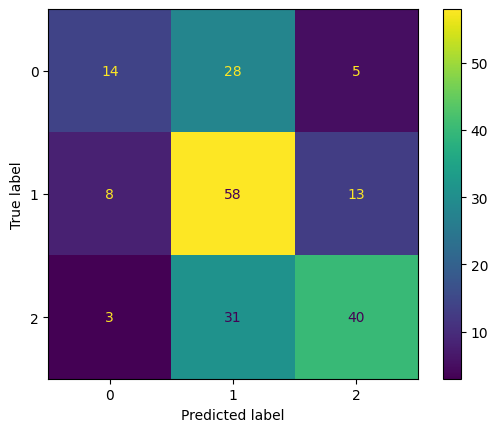

In [1409]:
from sklearn.ensemble import AdaBoostClassifier
adc_c=AdaBoostClassifier(n_estimators=120,learning_rate=1.0)
adc_c.fit(x_train,y_train)
pred=adc_c.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=adc_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adc_c.classes_)
disp.plot()
plt.show()

Accuracy_score 0.63


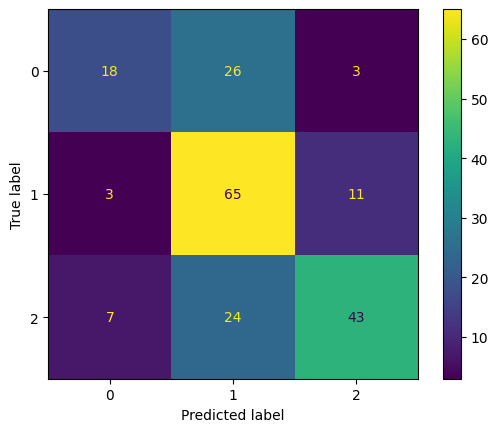

In [1416]:
from sklearn.ensemble import BaggingClassifier
bg_c=BaggingClassifier(DecisionTreeClassifier(criterion= 'gini', max_depth= 180, splitter= 'best',class_weight='balanced',min_samples_split=4,random_state=42),
                     n_estimators=200,bootstrap=True,n_jobs=-1)
bg_c.fit(x_train,y_train)
pred=bg_c.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=bg_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=bg_c.classes_)
disp.plot()
plt.show()

Accuracy_score 0.565


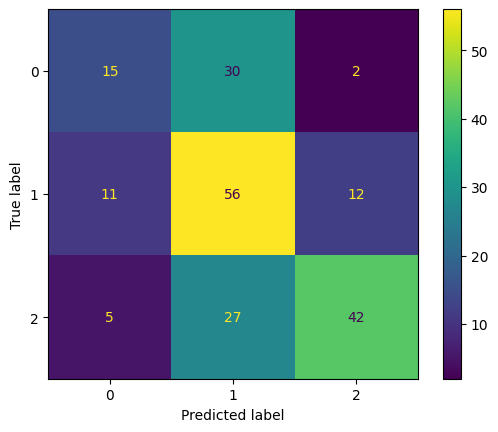

In [1422]:
from sklearn.ensemble import GradientBoostingClassifier
gbr_c=GradientBoostingClassifier(learning_rate=0.3,n_estimators=150,tol=0.2)
gbr_c.fit(x_train,y_train)
pred=gbr_c.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=gbr_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbr_c.classes_)
disp.plot()
plt.show()

Accuracy_score 0.64


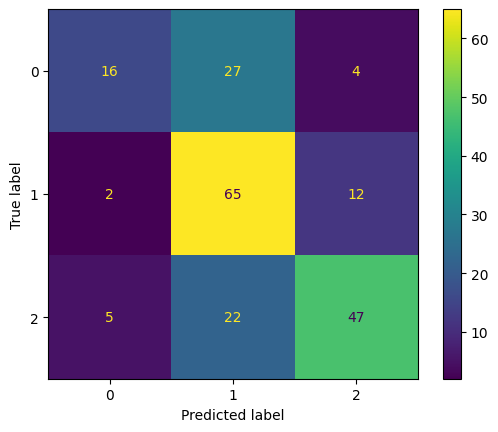

In [1436]:
from sklearn.ensemble import ExtraTreesClassifier
etc_c=ExtraTreesClassifier(n_estimators=120,criterion='log_loss',max_depth=170)
etc_c.fit(x_train,y_train)
pred=etc_c.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
cm = confusion_matrix(y_test, pred, labels=etc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=etc.classes_)
disp.plot()
plt.show()

Prediction

In [1308]:
df=pd.read_csv(r'D:\api_sentiment\Tweets.csv')
df_p=df.sample(100,random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_21680\2718755214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df_p,x='sentiment',palette=colors)


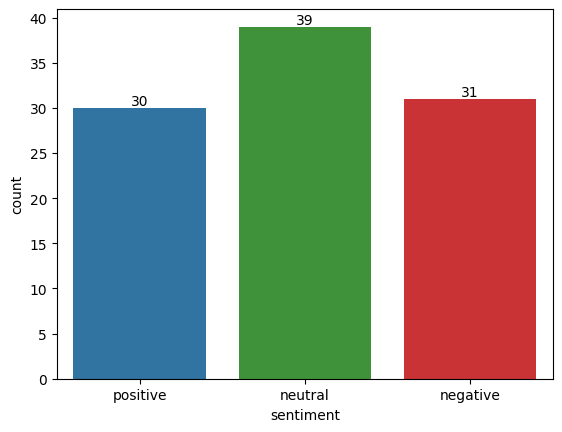

In [1309]:
colors = ["#1f78b4", "#33a02c", "#e31a1c"]
ax=sns.countplot(data=df_p,x='sentiment',palette=colors)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [1310]:
df_p['text']=df_p['text'].apply(transform)
x_p=tf.transform(df_p['text']).toarray()
y_p=df_p['sentiment'].values

In [1311]:
x.shape

(1000, 2015)

In [1312]:
x_p.shape

(100, 2015)

In [1313]:
x_p=np.array(x_p)
y_p=np.array(y_p)

In [1317]:
pred=vt.predict(x_p)

In [1318]:
accuracy_score(pred,y_p)

0.0

Text(0.5, 1.0, 'Count Plot of Values')

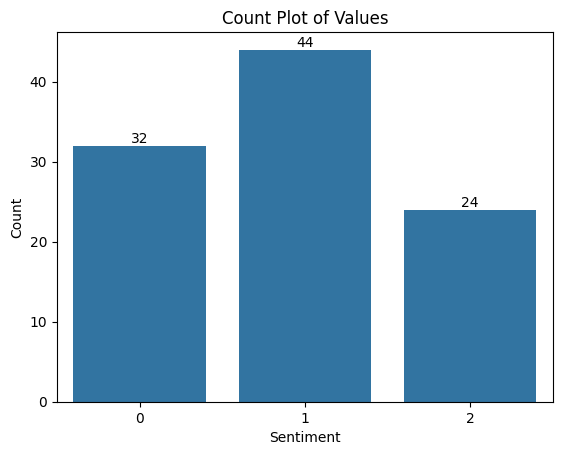

In [1319]:
ax=sns.countplot(x=pred)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Count Plot of Values")

In [ ]:
import pickle
pickle.dump(tf,open('vector.pkl','wb'))
pickle.dump(bg,open('model.pkl','wb'))

In [ ]:
filter['text']=filter['text'].apply(transform)

In [ ]:
x_match=tf.transform(filter['text'])

In [ ]:
pred_match=bg.predict(x_match)

In [ ]:
pred_label=pd.DataFrame({'text': filter['text'], 'label': pred_match})
pred_label[pred_label['label']==0]

,text,label
2,sad loss sure r go bounc back strong go india ...,0
45,wabash choir said long england team hit sweet ...,0


28-Jan-24 23:01:00 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


28-Jan-24 23:01:00 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Count Plot of Values')

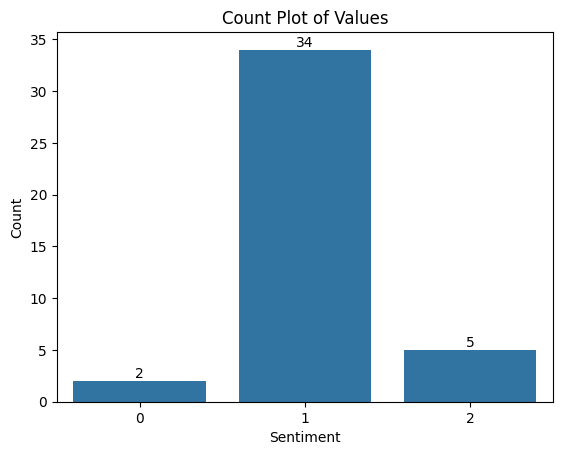

In [ ]:
ax=sns.countplot(x=pred_match)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Count Plot of Values")

In [ ]:
filter[filter['retweet']==filter['retweet'].max()]['text']

20    human perform poorli test 1040 run 20 test ave...
Name: text, dtype: object

In [ ]:
filter[filter['likes']==filter['likes'].max()]

,text,likes,retweet
20,human perform poorli test 1040 run 20 test ave...,5272,521


Deep Learning Approch

In [ ]:
df_1=pd.read_csv(r'D:\api_sentiment\Tweets.csv')
df_1.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df_1.drop(columns=['textID','selected_text'],inplace=True)

In [ ]:
df_1.shape

(27481, 2)

In [ ]:
df_1=df_1.sample(10000)

In [ ]:
df_1['text']=df_1['text'].apply(transform)

In [ ]:
df_1['sentiment'].value_counts()

sentiment
neutral     4045
positive    3119
negative    2836
Name: count, dtype: int64

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
df_1.head()

,text,sentiment
22761,effort follow,neutral
27119,tire,neutral
986,sez need get look flight email work tone,neutral
9214,fun fun night miss night sweet,neutral
1227,ok loop sorri,negative


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df_1['text'])
seq=tokenizer.texts_to_sequences(df_1['text'])

In [ ]:
l=len(tokenizer.word_index)

In [ ]:
seq[0]

[2162, 59]

In [ ]:
df_1['text'].head(1)

22761    effort follow
Name: text, dtype: object

In [ ]:
max_tok=max([len(x) for x in seq])

In [ ]:
max_tok

21

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences=pad_sequences(seq,maxlen=max_tok,padding='pre')

In [ ]:
padded_input_sequences

array([[   0,    0,    0, ...,    0, 2162,   59],
       [   0,    0,    0, ...,    0,    0,  122],
       [   0,    0,    0, ...,  426,    5,  952],
       ...,
       [   0,    0,    0, ...,   73,  154,  540],
       [   0,    0,    0, ...,  393,  325, 6969],
       [   0,    0,    0, ...,    0,    0, 6970]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df_1['sentiment']=lr.fit_transform(df_1['sentiment'])

In [ ]:
df_1.head()

,text,sentiment
22761,effort follow,1
27119,tire,1
986,sez need get look flight email work tone,1
9214,fun fun night miss night sweet,1
1227,ok loop sorri,0


In [ ]:
y=df_1['sentiment'].values

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=3)

In [ ]:
x=np.array(padded_input_sequences)
y=np.array(y)

In [ ]:
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout

In [ ]:
input_shape=x.shape[1]

In [ ]:
y.shape

(10000, 3)

In [ ]:
model=Sequential()
model.add(Embedding(l+1,50,input_length=input_shape))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 21, 50)            348550    
                                                                 
 lstm_8 (LSTM)               (None, 32)                10624     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 359273 (1.37 MB)
Trainable params: 359273 (1.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs=20,validation_split=0.2)

Epoch 1/20
 84/250 [=========>....................] - ETA: 2s - loss: 1.0760 - accuracy: 0.4044

250/250 [==============================] - 7s 17ms/step - loss: 0.9588 - accuracy: 0.5201 - val_loss: 0.8091 - val_accuracy: 0.6480
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 0.6517 - accuracy: 0.7360 - val_loss: 0.8062 - val_accuracy: 0.6735
Epoch 3/20
250/250 [==============================] - 2s 9ms/step - loss: 0.4885 - accuracy: 0.8164 - val_loss: 0.8665 - val_accuracy: 0.6465
Epoch 4/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3893 - accuracy: 0.8621 - val_loss: 0.9665 - val_accuracy: 0.6390
Epoch 5/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3220 - accuracy: 0.8899 - val_loss: 1.1174 - val_accuracy: 0.6210
Epoch 6/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2725 - accuracy: 0.9097 - val_loss: 1.1427 - val_accuracy: 0.6310
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2320 - accuracy: 0.9243 - val_loss: 1.3786 - val_accuracy: 0.6130
Epoch 8/20
250/2

In [ ]:
text="this is me"
text=transform(text)
token_text=tokenizer.texts_to_sequences([text])[0]
pad_text=pad_sequences([token_text],maxlen=max_tok,padding='pre')
np.argmax(model.predict(pad_text))

1/1 [==============================] - 0s 342ms/step


1

In [ ]:
token_text

[[100, 3593]]